In [52]:
# import dependencies
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
courtyard_predicted = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/model/courtyard.csv')

In [87]:
# load data
courtyard_observed = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/recorded/courtyardrecorded.csv').sample(n=8)
courtyard_predicted = pd.read_csv('/Users/leeyilin/Downloads/netlogo/data/model/courtyard.csv').sample(n=8)

In [88]:
# view observed courtyard data
courtyard_observed.head()

,Category,air temp,ground temp
9,9700,33.2,36.0
10,11000,33.4,38.0
3,3900,33.1,35.2
0,0,33.2,45.2
12,15000,34.3,38.9


In [102]:
# view predicted courtyard data
courtyard_predicted.head()

,Category,air temp,ground temp
0,0,3.0,0.0
1,1,23.0,20.0
2,2,23.0,20.0
3,3,23.0,20.0
4,4,23.0,20.0


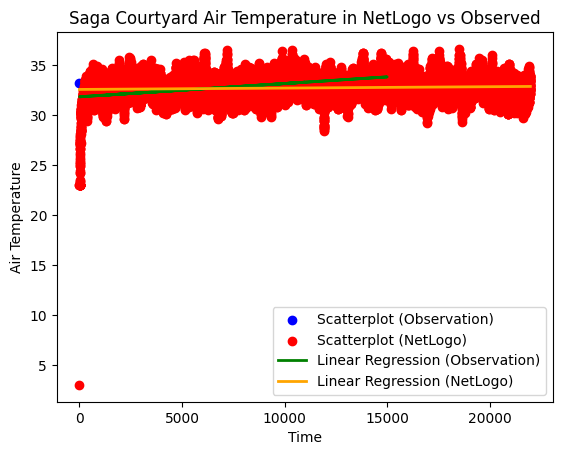

In [103]:
# extract values from observed and model values
x1 = courtyard_observed['Category'].values.reshape(-1, 1)
y1 = courtyard_observed['air temp'].values

x2 = courtyard_predicted['Category'].values.reshape(-1, 1)
y2 = courtyard_predicted['air temp'].values

# plot scatterplot
plt.scatter(x1, y1, color='blue', label='Scatterplot (Observation)')
plt.scatter(x2, y2, color='red', label='Scatterplot (NetLogo)')

# fit linear regression
model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(x1, y1)
model2.fit(x2, y2)
y_pred1 = model1.predict(x1)
y_pred2 = model2.predict(x2)

# plot regression line
plt.plot(x1, y_pred1, color='green', linestyle='-', linewidth=2, label='Linear Regression (Observation)')
plt.plot(x2, y_pred2, color='orange', linestyle='-', linewidth=2, label='Linear Regression (NetLogo)')

# add labels and titles to plot
plt.xlabel('Time')
plt.ylabel('Air Temperature')
plt.title('Saga Courtyard Air Temperature in NetLogo vs Observed')
plt.legend()

# show plot
plt.show()
